In [1]:
# import library

import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# import data

df = pd.read_csv('Heart Disease data.csv')
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


No missing values

In [4]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

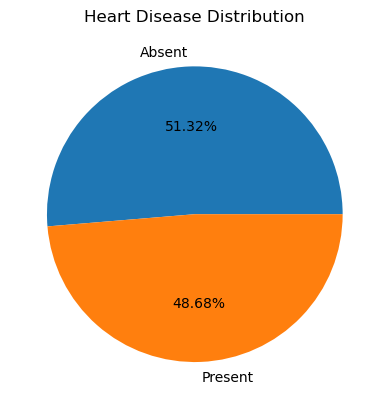

In [5]:
plt.pie(df['target'].value_counts(), labels=['Absent', 'Present'], autopct='%1.2f%%')
plt.title('Heart Disease Distribution')
plt.show()

Around 48.68% of people have heart disease

# Gender

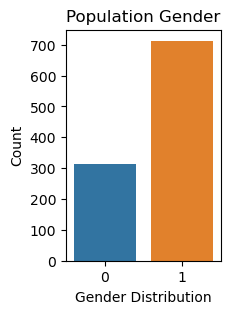

In [6]:
plt.figure(figsize=(2, 3))
sns.countplot(x='sex', data=df)
plt.title('Population Gender')
plt.xlabel('Gender Distribution')
plt.ylabel('Count')
plt.show()

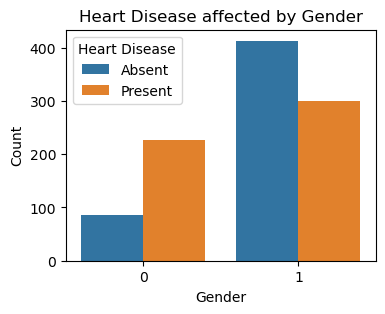

In [7]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='sex', hue='target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Heart Disease affected by Gender')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

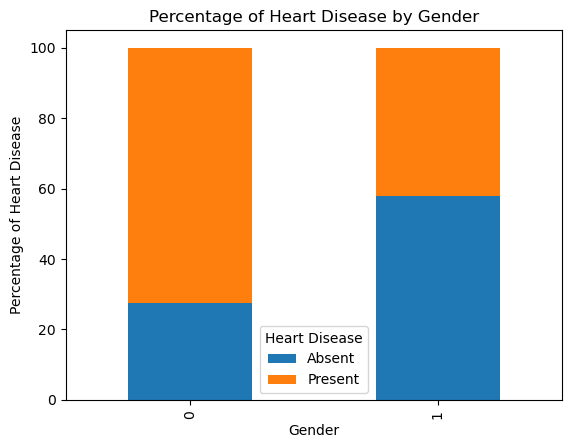

In [8]:
total_counts = df.groupby('sex').size()
percentage_data = df.groupby(['sex', 'target']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Percentage of Heart Disease')
plt.title('Percentage of Heart Disease by Gender')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [9]:
contingency_table = pd.crosstab(df['target'], df['sex'])
print(contingency_table)

percentage_table = contingency_table / contingency_table.sum() * 100
print(percentage_table)

sex       0    1
target          
0        86  413
1       226  300
sex             0          1
target                      
0       27.564103  57.924264
1       72.435897  42.075736


Gender 0 (72.44%) tend to have more heart disease than gender 1 (42.08%)

# Age

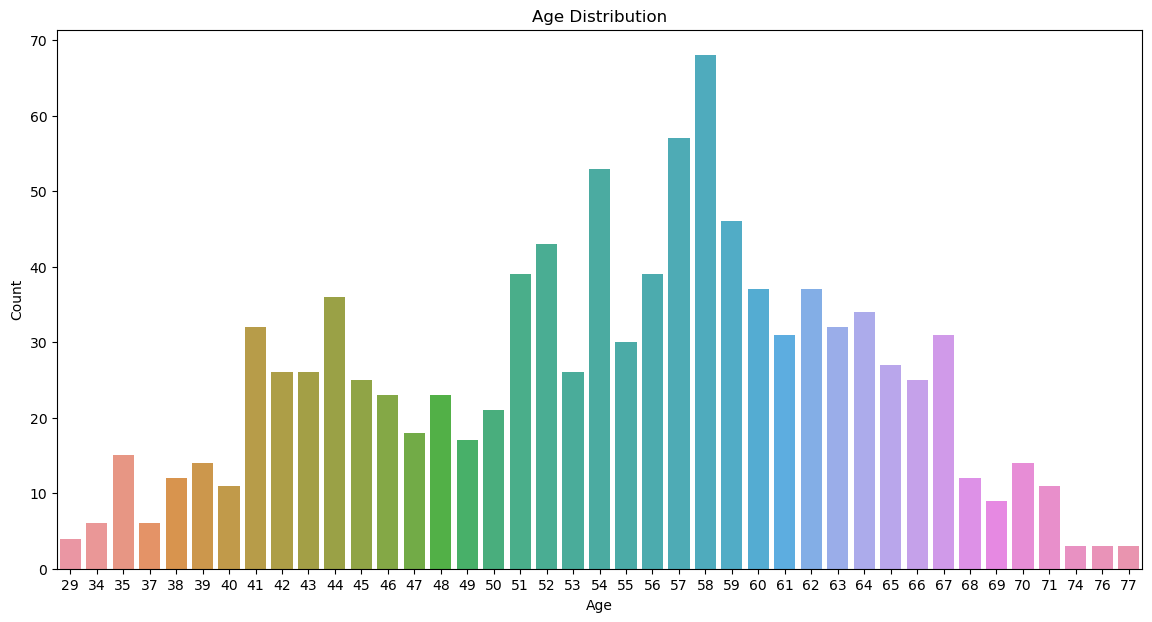

In [10]:
plt.figure(figsize=(14, 7))
sns.countplot(x='age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

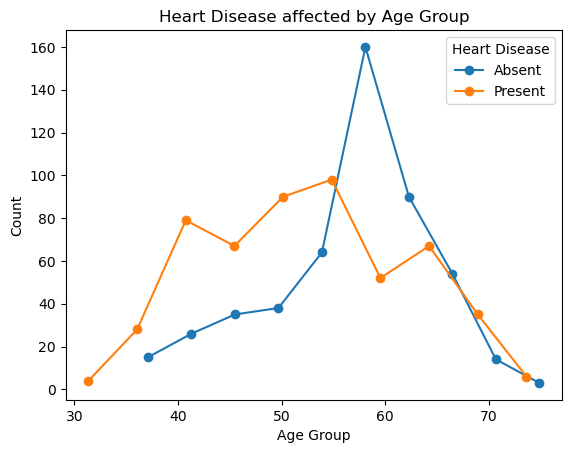

In [11]:
categories = df['target'].unique()
for category in categories:
    subset = df[df['target'] == category]
    counts, bin_edges = np.histogram(subset['age'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Heart Disease affected by Age Group')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

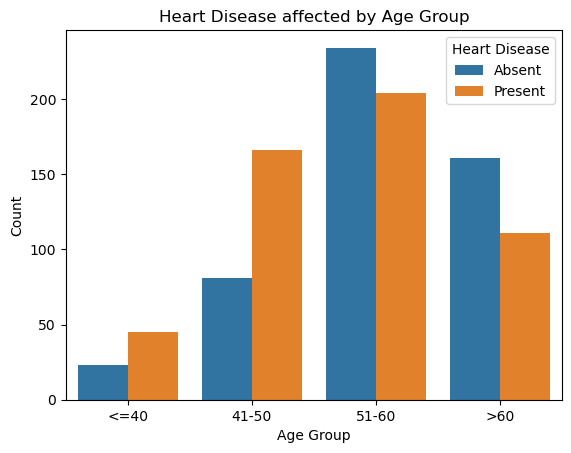

In [12]:
df['age_group'] = pd.cut(df['age'], bins=[28, 40, 50, 60, 77], labels=['<=40', '41-50', '51-60', '>60'])

sns.countplot(data=df, x='age_group', hue='target')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Heart Disease affected by Age Group')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

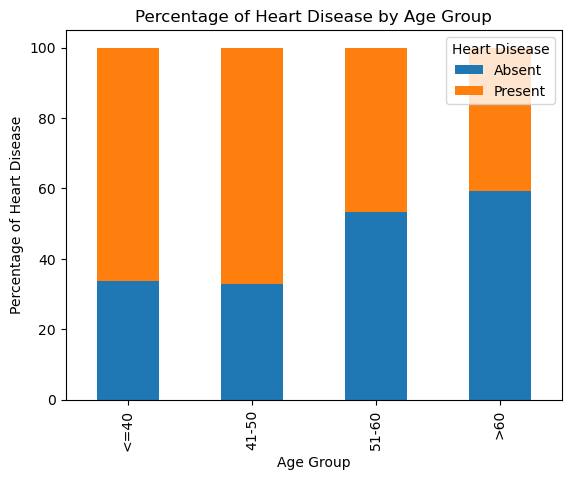

In [13]:
total_counts = df.groupby('age_group').size()
percentage_data = df.groupby(['age_group', 'target']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Age Group')
plt.ylabel('Percentage of Heart Disease')
plt.title('Percentage of Heart Disease by Age Group')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [14]:
contingency_table = pd.crosstab(df['target'], df['age_group'])
print(contingency_table)

percentage_table = contingency_table / contingency_table.sum() * 100
print(percentage_table)

age_group  <=40  41-50  51-60  >60
target                            
0            23     81    234  161
1            45    166    204  111
age_group       <=40      41-50      51-60        >60
target                                               
0          33.823529  32.793522  53.424658  59.191176
1          66.176471  67.206478  46.575342  40.808824


At around age of 41 to 50, people tend to have more heart disease (67.21%) and above age of 60 people tend to have less heart disease (40.81%)

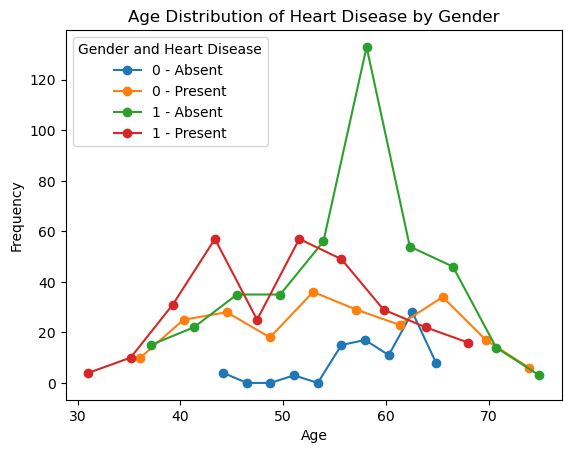

In [15]:
for sex in [0, 1]:
    subset = df[df['sex'] == sex]
    
    for target in [0, 1]:
        subset_ = subset[subset['target'] == target]
        
        counts, bin_edges = np.histogram(subset_['age'])
        bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
        plt.plot(bin_midpoints, counts, marker='o', linestyle='-')
    

plt.title('Age Distribution of Heart Disease by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender and Heart Disease', labels=['0 - Absent', '0 - Present', '1 - Absent', '1 - Present'])
plt.show()

# Correlation Matrix

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

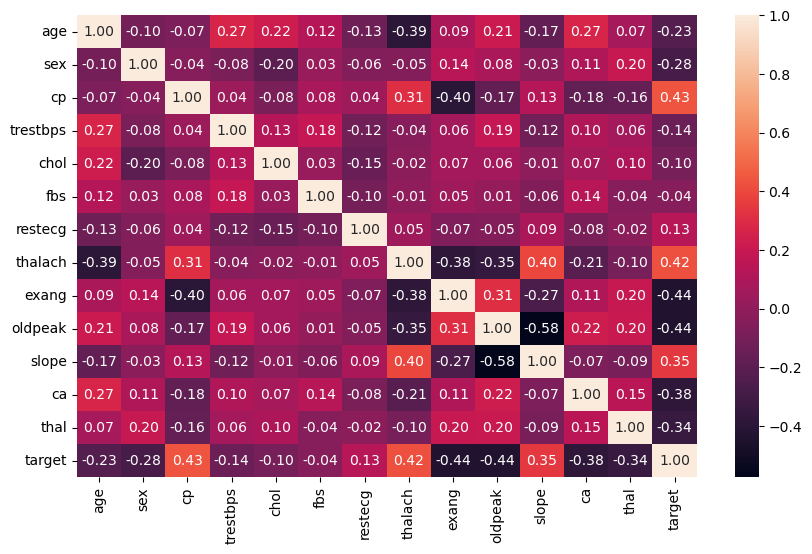

In [16]:
matrix = df.corr()
print(matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, fmt=".2f")
plt.show()

resting blood pressure, serum cholestoral in mg/dl, fasting blood sugar > 120 mg/dl, resting electrocardiographic results have weak correlation with heart disease (0 - 0.15)

age and sex have moderate correlation with heart disease (0.15 - 0.3)

chest pain, maximum heart rate achieved, exercise induced angina, oldpeak, the slope of the peak exercise ST segment, number of major vessels colored by flourosopy, thal have good correlation with heart disease (0.3 - 0.5)

## Few interesting correlation
    exercise induced angina with chest pain
    maximum heart rate achieved with slope of the peak exercise ST segment, exercise induced angina, age
    oldpeak with the slope of the peak exercise ST segment [very good], maximum heart rate achieved

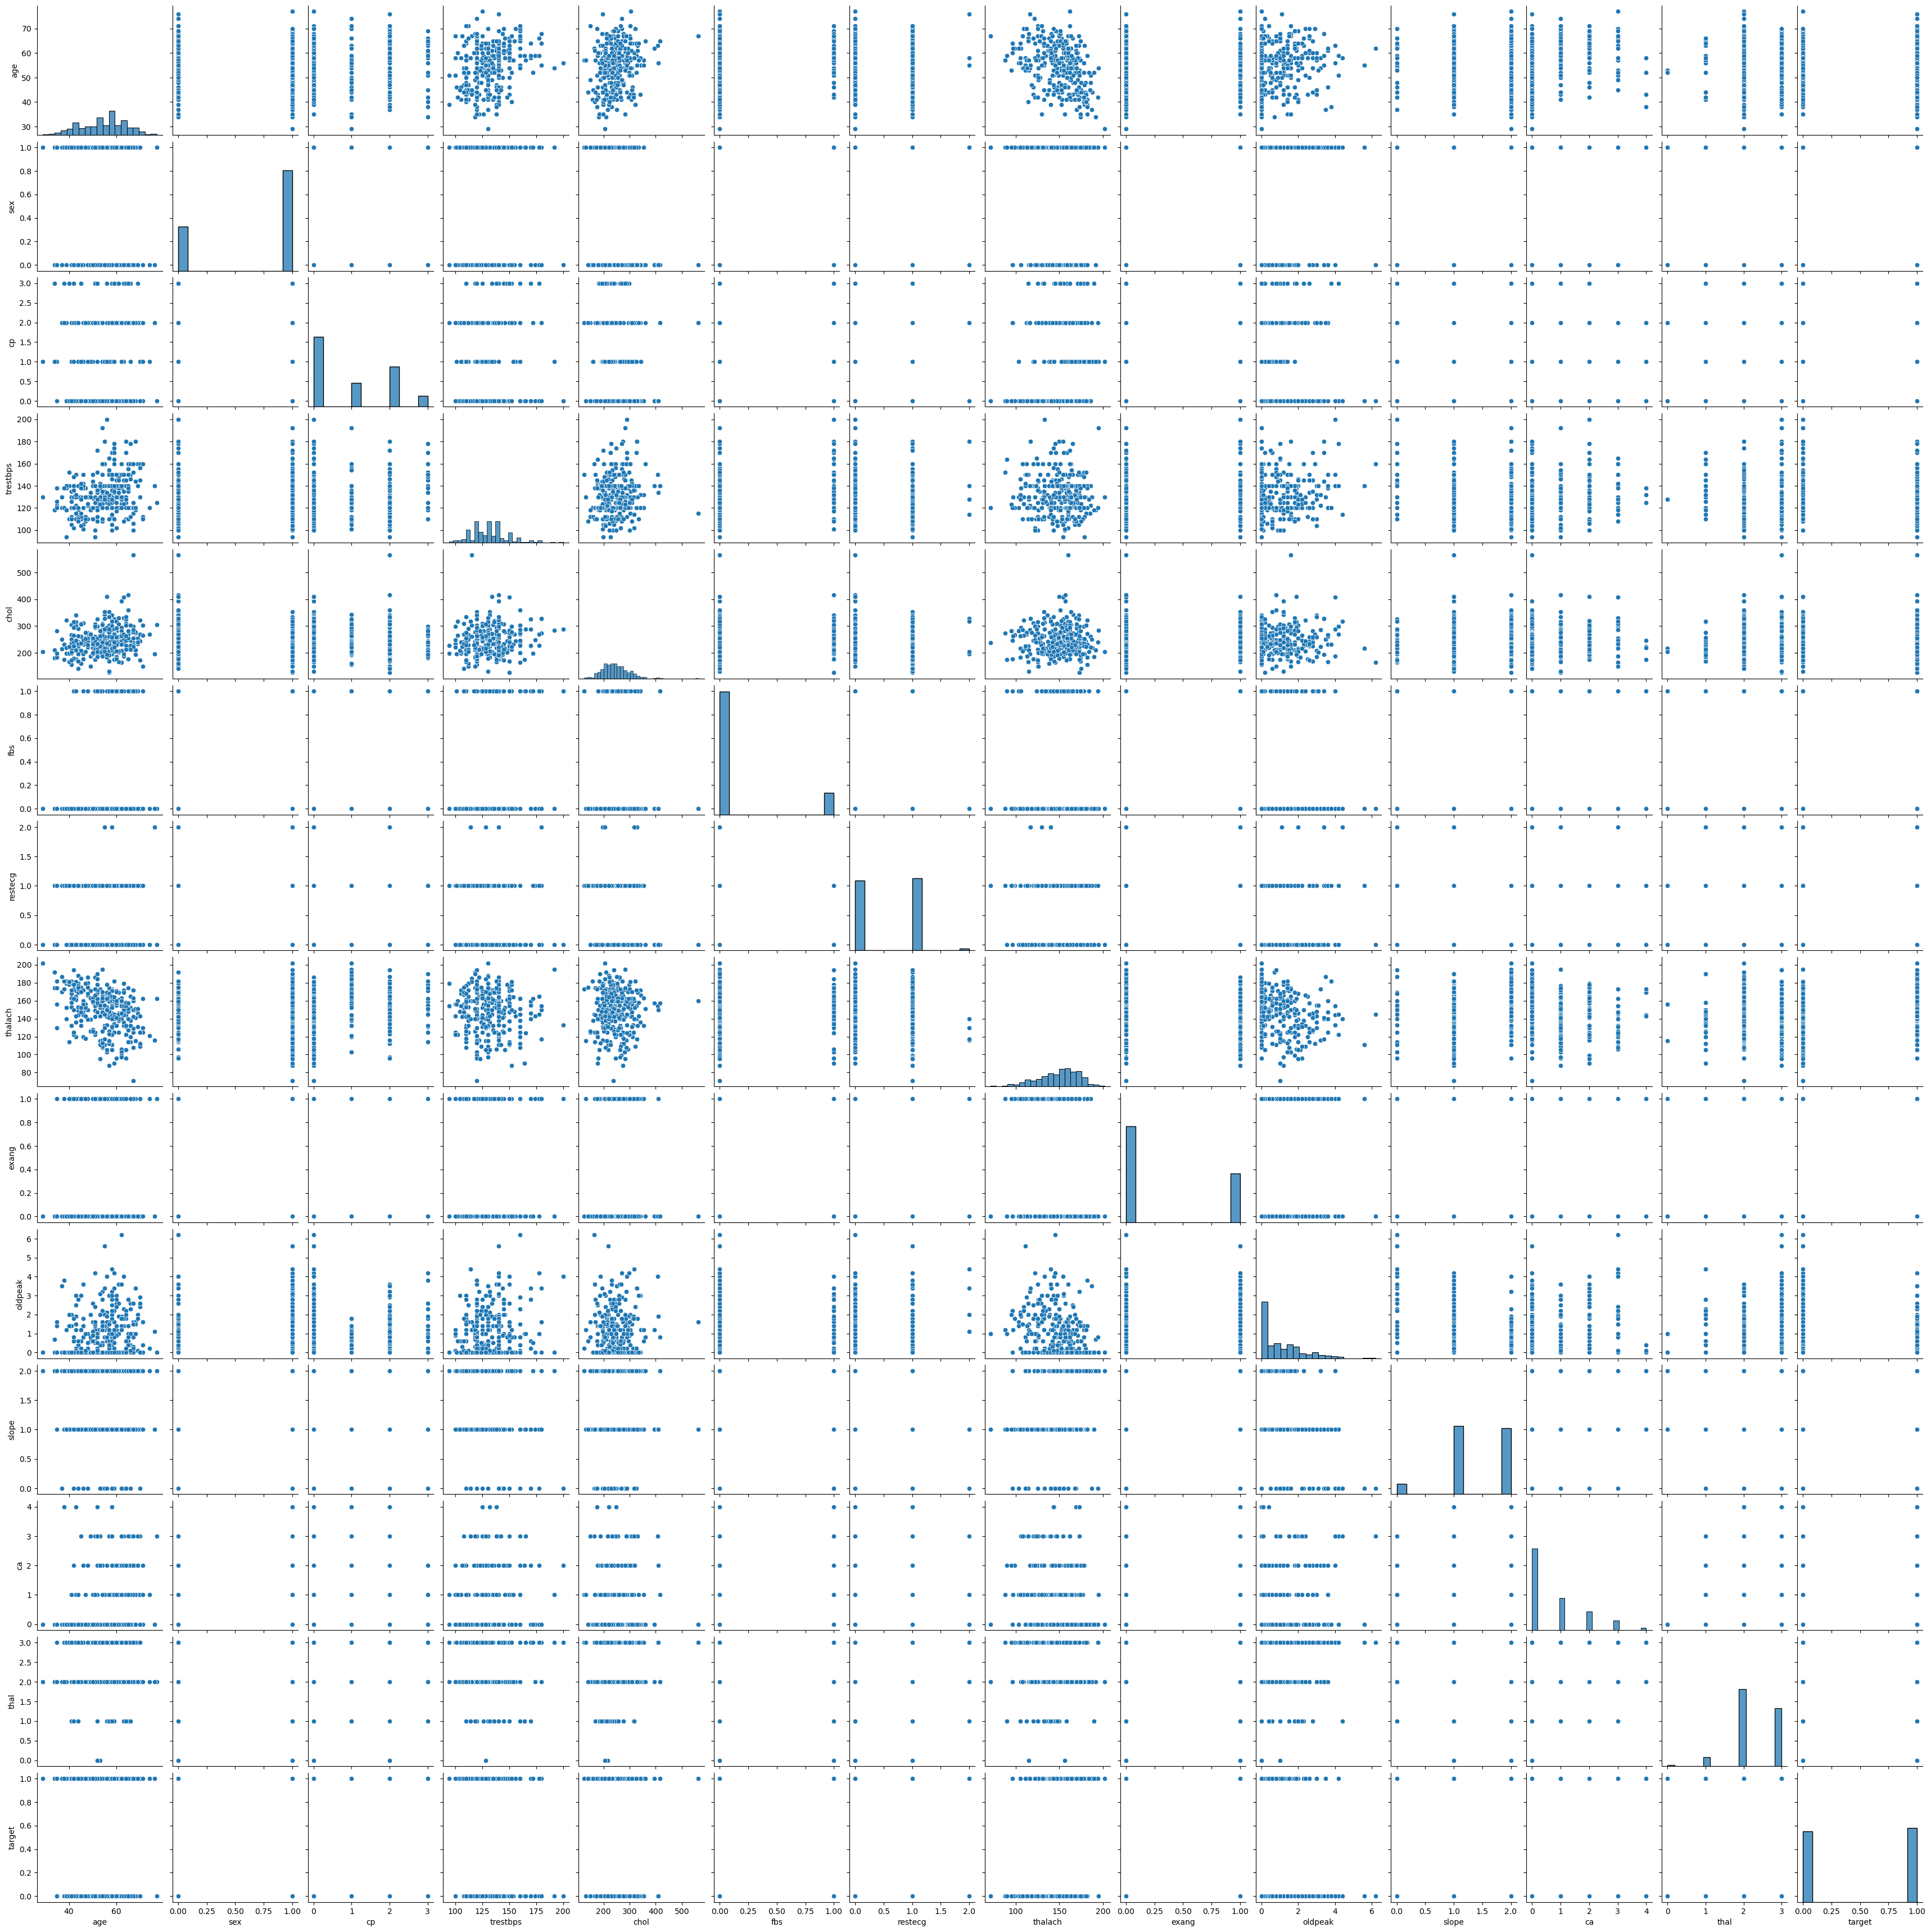

In [17]:
sns.pairplot(df)
plt.show()

# Chest Pain

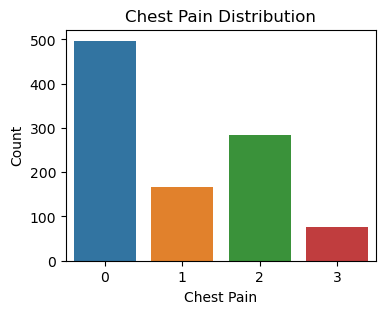

In [18]:
plt.figure(figsize=(4, 3))
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Distribution')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.show()

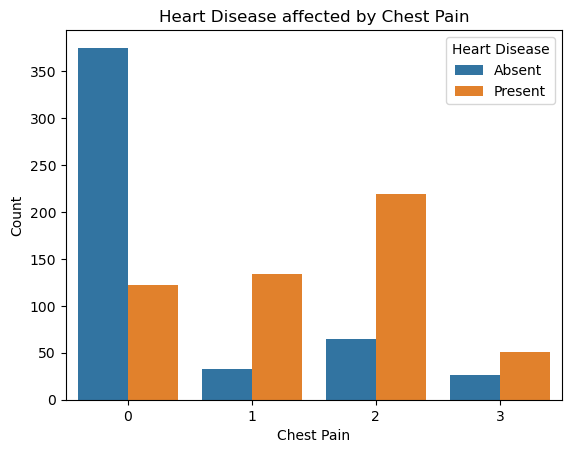

In [19]:
sns.countplot(data=df, x='cp', hue='target')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title('Heart Disease affected by Chest Pain')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

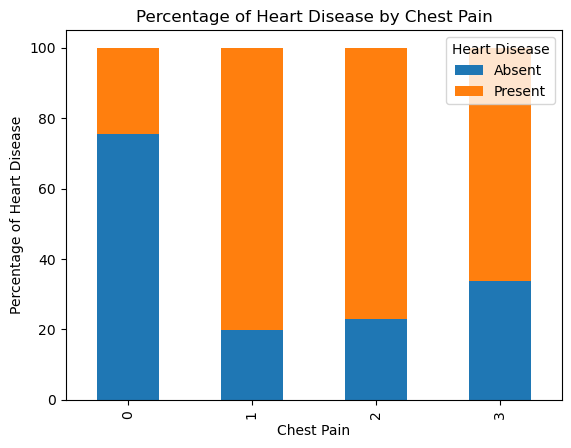

In [20]:
total_counts = df.groupby('cp').size()
percentage_data = df.groupby(['cp', 'target']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Chest Pain')
plt.ylabel('Percentage of Heart Disease')
plt.title('Percentage of Heart Disease by Chest Pain')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [21]:
contingency_table = pd.crosstab(df['target'], df['cp'], margins=True)
print(contingency_table)

percentage_table = contingency_table / pd.crosstab(df['target'], df['cp']).sum().sum() * 100
print(percentage_table)

cp        0    1    2   3   All
target                         
0       375   33   65  26   499
1       122  134  219  51   526
All     497  167  284  77  1025
cp              0          1          2         3         All
target                                                       
0       36.585366   3.219512   6.341463  2.536585   48.682927
1       11.902439  13.073171  21.365854  4.975610   51.317073
All     48.487805  16.292683  27.707317  7.512195  100.000000


Type 0 chest pain mostly does not imply heart disease

Type 2 chest pain is the mostly observed in case of heart disease

# Slope of the peak exercise ST segment

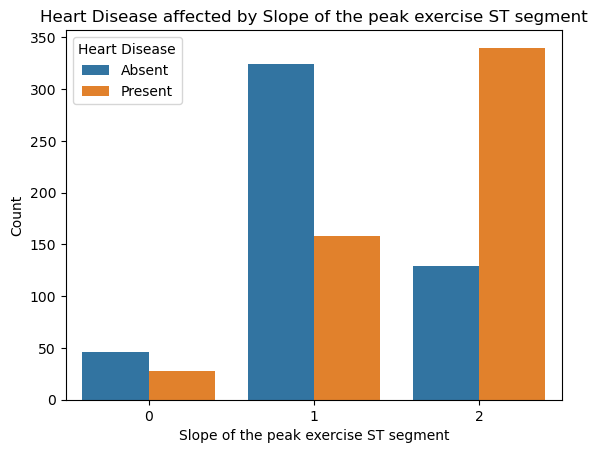

In [22]:
sns.countplot(data=df, x='slope', hue='target')
plt.xlabel('Slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.title('Heart Disease affected by Slope of the peak exercise ST segment')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

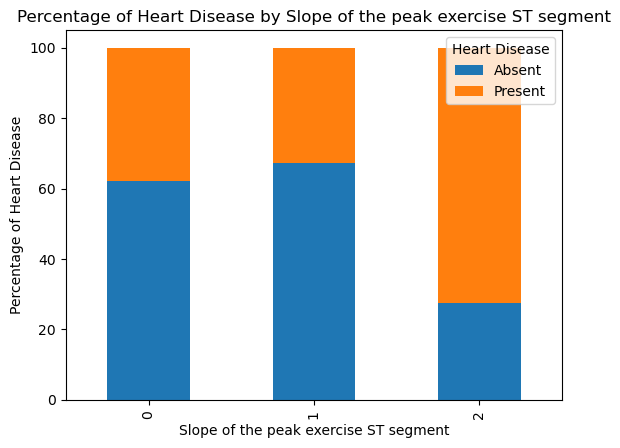

In [23]:
total_counts = df.groupby('slope').size()
percentage_data = df.groupby(['slope', 'target']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Slope of the peak exercise ST segment')
plt.ylabel('Percentage of Heart Disease')
plt.title('Percentage of Heart Disease by Slope of the peak exercise ST segment')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [24]:
contingency_table = pd.crosstab(df['target'], df['slope'], margins=True)
print(contingency_table)

percentage_table = contingency_table / pd.crosstab(df['target'], df['slope']).sum().sum() * 100
print(percentage_table)

slope    0    1    2   All
target                    
0       46  324  129   499
1       28  158  340   526
All     74  482  469  1025
slope          0          1          2         All
target                                            
0       4.487805  31.609756  12.585366   48.682927
1       2.731707  15.414634  33.170732   51.317073
All     7.219512  47.024390  45.756098  100.000000


In case of heart disease, the slope of the peak exercise ST segment is mostly 2

The slope being 1 mostly implies the absence of heart disease

# Number of major vessels colored by flourosopy

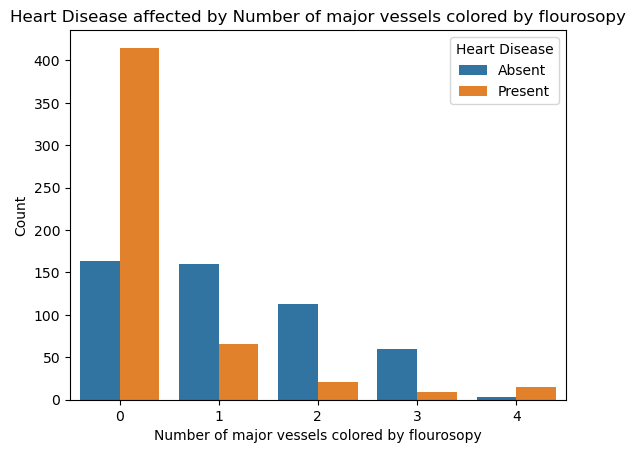

In [25]:
sns.countplot(data=df, x='ca', hue='target')
plt.xlabel('Number of major vessels colored by flourosopy')
plt.ylabel('Count')
plt.title('Heart Disease affected by Number of major vessels colored by flourosopy')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

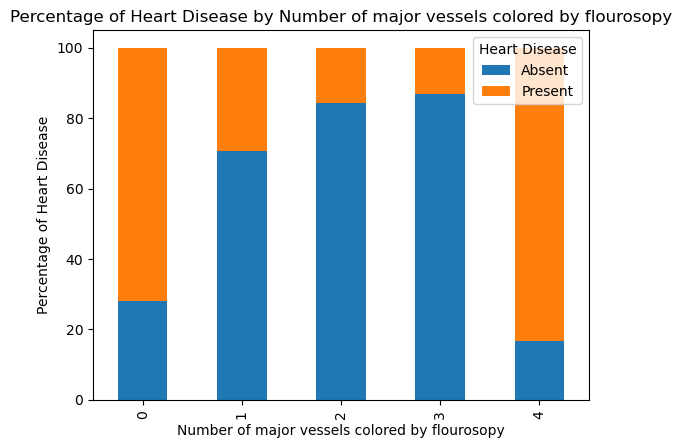

In [26]:
total_counts = df.groupby('ca').size()
percentage_data = df.groupby(['ca', 'target']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Number of major vessels colored by flourosopy')
plt.ylabel('Percentage of Heart Disease')
plt.title('Percentage of Heart Disease by Number of major vessels colored by flourosopy')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [27]:
contingency_table = pd.crosstab(df['target'], df['ca'], margins=True)
print(contingency_table)

percentage_table = contingency_table / pd.crosstab(df['target'], df['ca']).sum().sum() * 100
print(percentage_table)

ca        0    1    2   3   4   All
target                             
0       163  160  113  60   3   499
1       415   66   21   9  15   526
All     578  226  134  69  18  1025
ca              0          1          2         3         4         All
target                                                                 
0       15.902439  15.609756  11.024390  5.853659  0.292683   48.682927
1       40.487805   6.439024   2.048780  0.878049  1.463415   51.317073
All     56.390244  22.048780  13.073171  6.731707  1.756098  100.000000


In case of heart disease, generally none of major vessels are colored by flouroscopy

# Thal

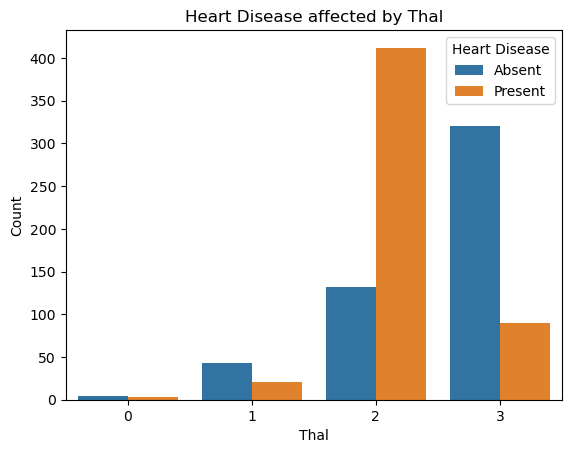

In [28]:
sns.countplot(data=df, x='thal', hue='target')
plt.xlabel('Thal')
plt.ylabel('Count')
plt.title('Heart Disease affected by Thal')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

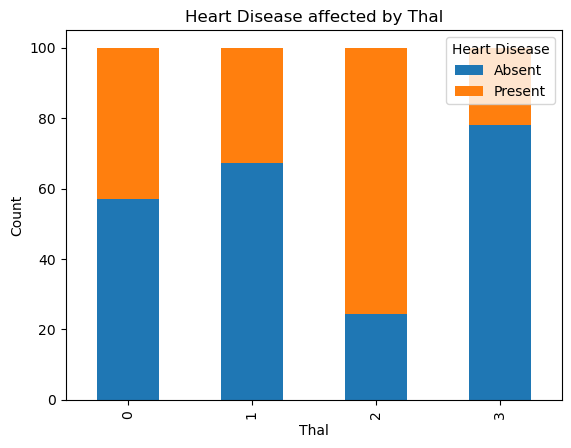

In [29]:
total_counts = df.groupby('thal').size()
percentage_data = df.groupby(['thal', 'target']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Thal')
plt.ylabel('Count')
plt.title('Heart Disease affected by Thal')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [30]:
contingency_table = pd.crosstab(df['target'], df['thal'], margins=True)
print(contingency_table)

percentage_table = contingency_table / pd.crosstab(df['target'], df['thal']).sum().sum() * 100
print(percentage_table)

thal    0   1    2    3   All
target                       
0       4  43  132  320   499
1       3  21  412   90   526
All     7  64  544  410  1025
thal           0         1          2          3         All
target                                                      
0       0.390244  4.195122  12.878049  31.219512   48.682927
1       0.292683  2.048780  40.195122   8.780488   51.317073
All     0.682927  6.243902  53.073171  40.000000  100.000000


Reversible defect in thal has higher chance of heart disease

# Exercise induced angina

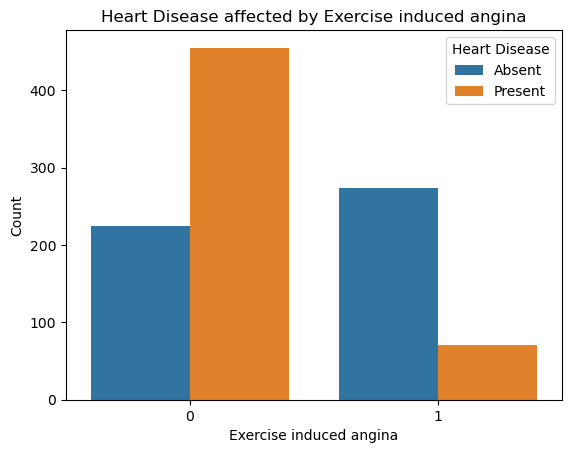

In [31]:
sns.countplot(data=df, x='exang', hue='target')
plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.title('Heart Disease affected by Exercise induced angina')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

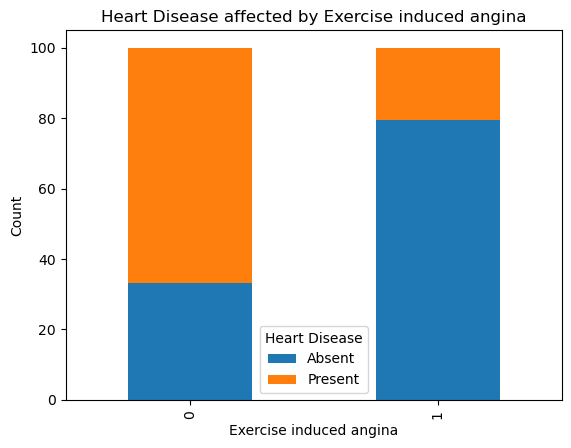

In [32]:
total_counts = df.groupby('exang').size()
percentage_data = df.groupby(['exang', 'target']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.title('Heart Disease affected by Exercise induced angina')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [33]:
contingency_table = pd.crosstab(df['target'], df['exang'], margins=True)
print(contingency_table)

percentage_table = contingency_table / pd.crosstab(df['target'], df['exang']).sum().sum() * 100
print(percentage_table)

exang     0    1   All
target                
0       225  274   499
1       455   71   526
All     680  345  1025
exang           0          1         All
target                                  
0       21.951220  26.731707   48.682927
1       44.390244   6.926829   51.317073
All     66.341463  33.658537  100.000000


Presence of Exercise induced angina generally implies the absence of heart disease

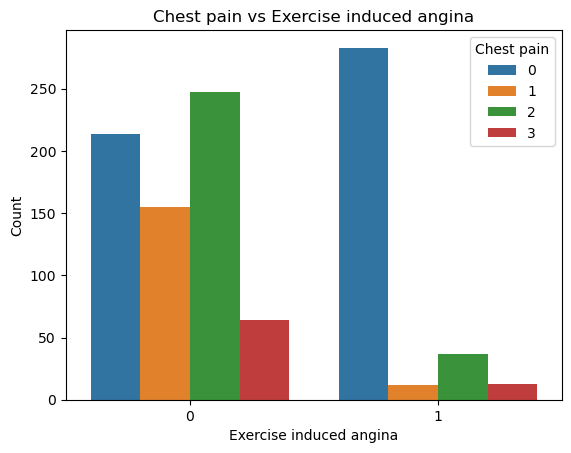

In [34]:
sns.countplot(data=df, x='exang', hue='cp')
plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.title('Chest pain vs Exercise induced angina')
plt.legend(title='Chest pain', labels=[0, 1, 2, 3])
plt.show()

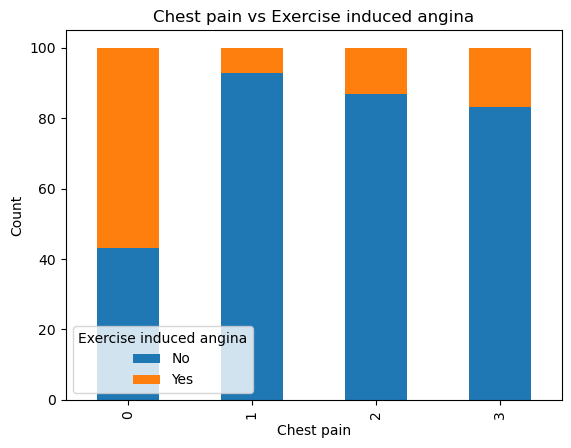

In [35]:
total_counts = df.groupby('cp').size()
percentage_data = df.groupby(['cp', 'exang']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Chest pain')
plt.ylabel('Count')
plt.title('Chest pain vs Exercise induced angina')
plt.legend(title='Exercise induced angina', labels=['No', 'Yes'])
plt.show()

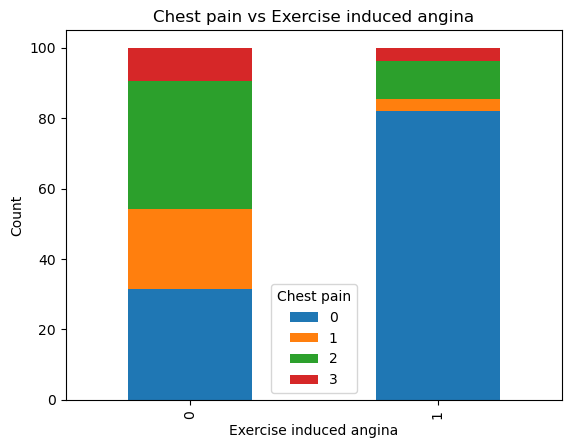

In [36]:
total_counts = df.groupby('exang').size()
percentage_data = df.groupby(['exang', 'cp']).size().unstack().div(total_counts, axis=0) * 100
percentage_data.plot(kind='bar', stacked=True)

plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.title('Chest pain vs Exercise induced angina')
plt.legend(title='Chest pain', labels=[0, 1, 2, 3])
plt.show()

In [37]:
contingency_table = pd.crosstab(df['exang'], df['cp'], margins=True)
print(contingency_table)

percentage_table = contingency_table / pd.crosstab(df['exang'], df['cp']).sum().sum() * 100
print(percentage_table)

cp       0    1    2   3   All
exang                         
0      214  155  247  64   680
1      283   12   37  13   345
All    497  167  284  77  1025
cp             0          1          2         3         All
exang                                                       
0      20.878049  15.121951  24.097561  6.243902   66.341463
1      27.609756   1.170732   3.609756  1.268293   33.658537
All    48.487805  16.292683  27.707317  7.512195  100.000000


In case of exercise induced angina, chest pain is mostly of type 0

In [38]:
contingency_table = pd.crosstab(index=[df['exang'], df['target']], columns=df['cp'], margins=True)
print(contingency_table)

cp              0    1    2   3   All
exang target                         
0     0       122   30   51  22   225
      1        92  125  196  42   455
1     0       253    3   14   4   274
      1        30    9   23   9    71
All           497  167  284  77  1025


# Maximum heart rate achieved

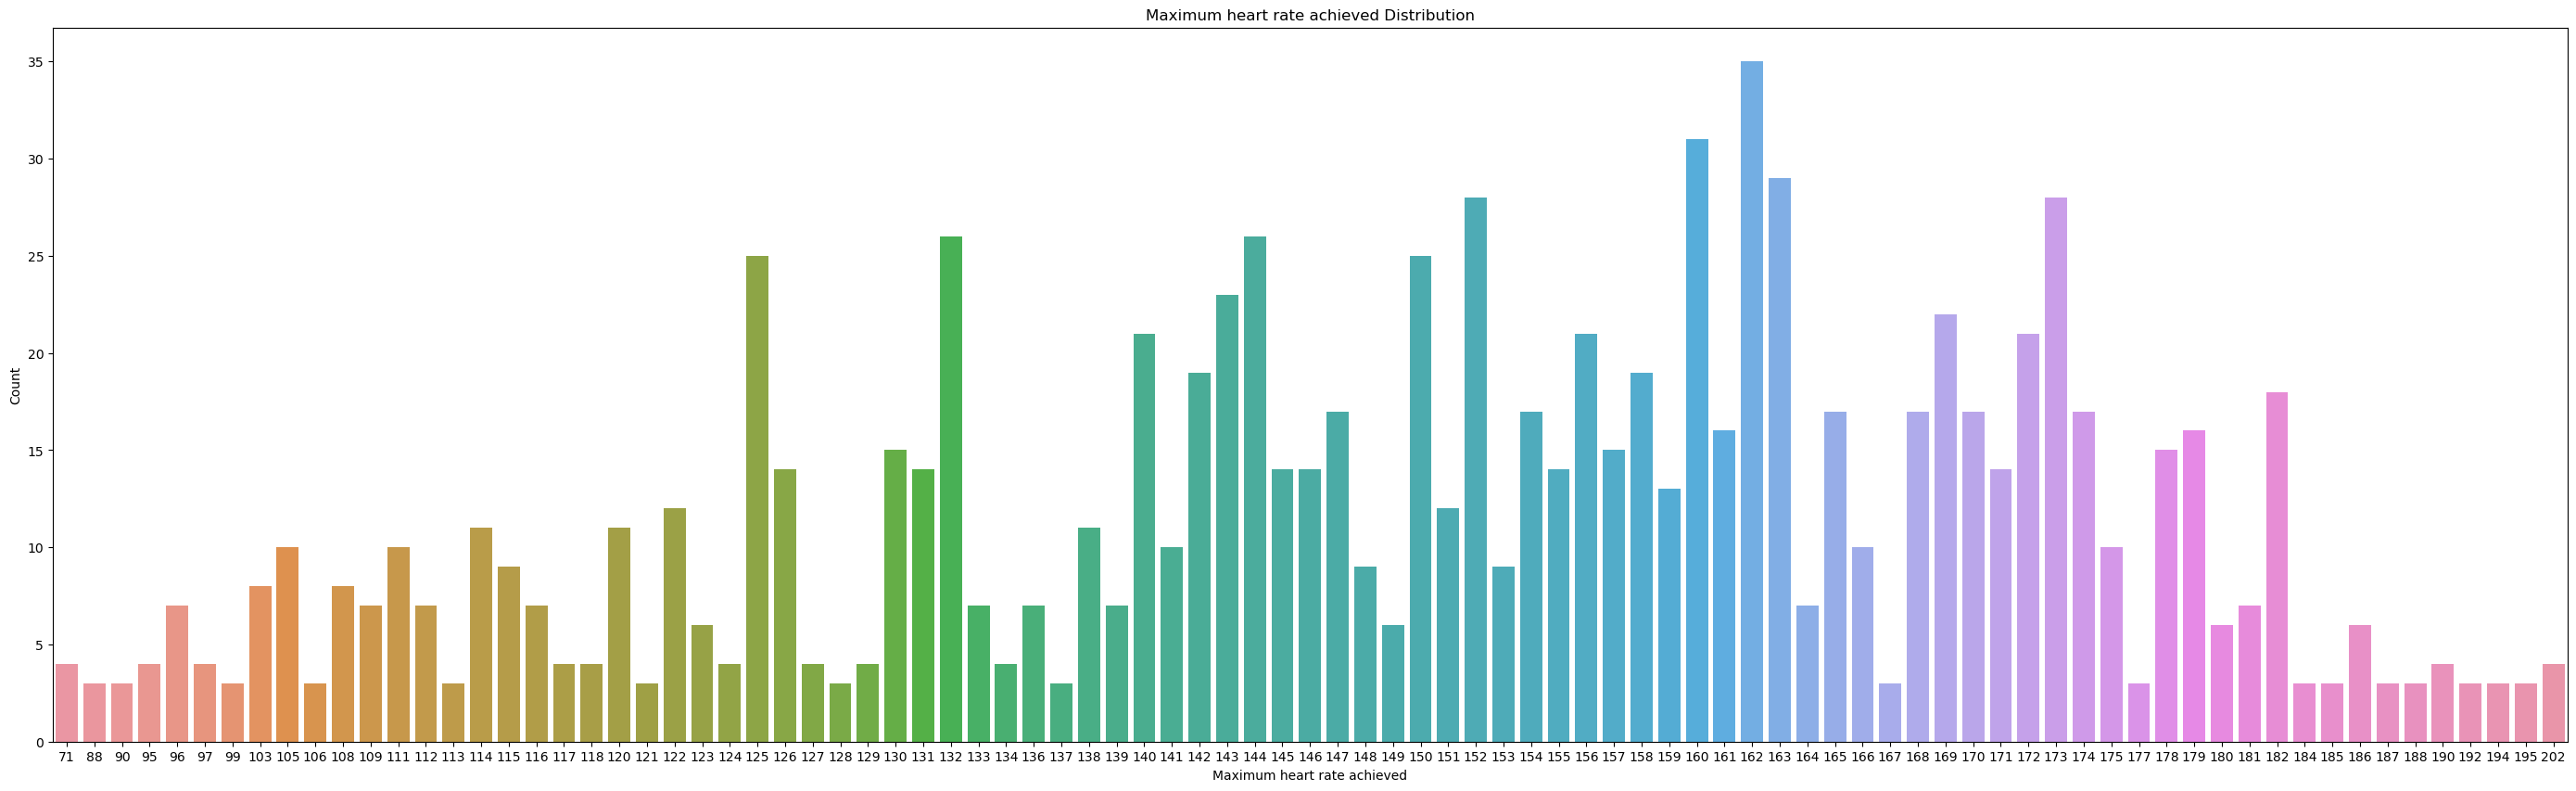

In [39]:
plt.figure(figsize=(35, 10))
sns.countplot(x='thalach', data=df)
plt.title('Maximum heart rate achieved Distribution')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.show()

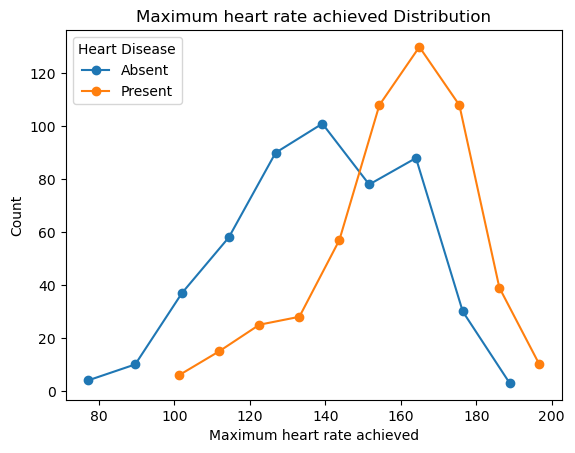

In [40]:
categories = df['target'].unique()
for category in categories:
    subset = df[df['target'] == category]
    counts, bin_edges = np.histogram(subset['thalach'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-')

    
plt.title('Maximum heart rate achieved Distribution')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In case of heart disease maximum heart recieved achieved is elevated

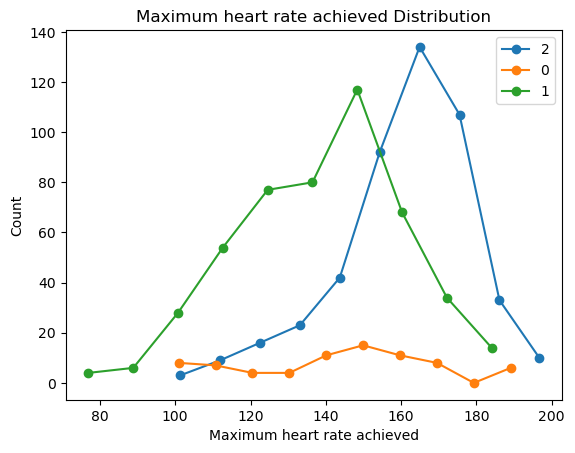

In [41]:
categories = df['slope'].unique()
for category in categories:
    subset = df[df['slope'] == category]
    counts, bin_edges = np.histogram(subset['thalach'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

    
plt.title('Maximum heart rate achieved Distribution')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.legend()
plt.show()

In case of slope of the peak exercise ST segment being 2 the maximum heart recieved achieved is more than slope of the peak exercise ST segment being 1

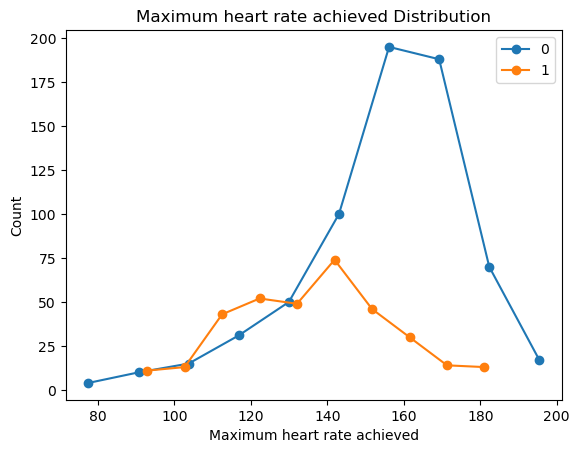

In [42]:
categories = df['exang'].unique()
for category in categories:
    subset = df[df['exang'] == category]
    counts, bin_edges = np.histogram(subset['thalach'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

    
plt.title('Maximum heart rate achieved Distribution')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.legend()
plt.show()

In absence of exercise induced angina maximum heart recieved achieved is elevated

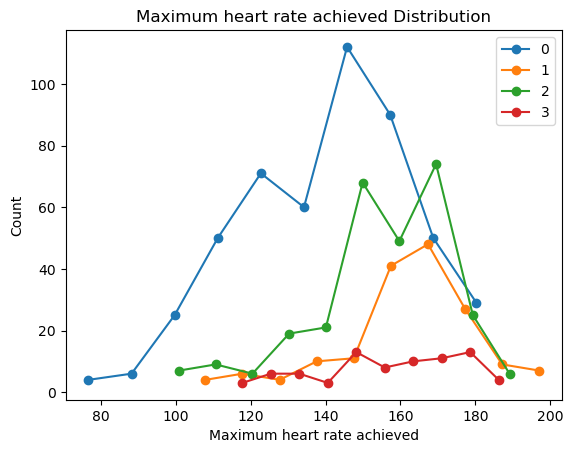

In [43]:
categories = df['cp'].unique()
for category in categories:
    subset = df[df['cp'] == category]
    counts, bin_edges = np.histogram(subset['thalach'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

    
plt.title('Maximum heart rate achieved Distribution')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.legend()
plt.show()

Maximum heart rate achieved is less in case of chest pain type 0

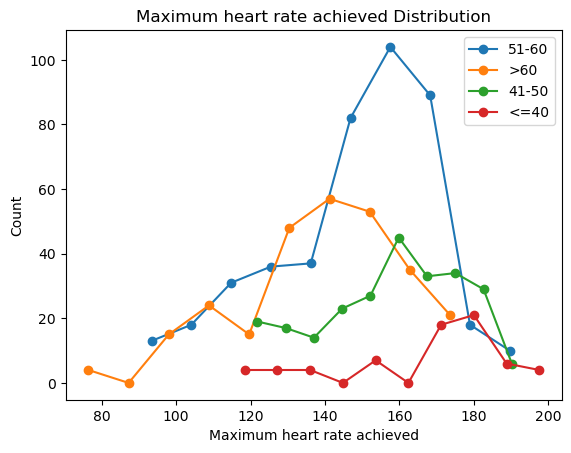

In [44]:
categories = df['age_group'].unique()
for category in categories:
    subset = df[df['age_group'] == category]
    counts, bin_edges = np.histogram(subset['thalach'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

    
plt.title('Maximum heart rate achieved Distribution')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.legend()
plt.show()

As age increases, maximum heart rate achieved decreases

# Oldpeak

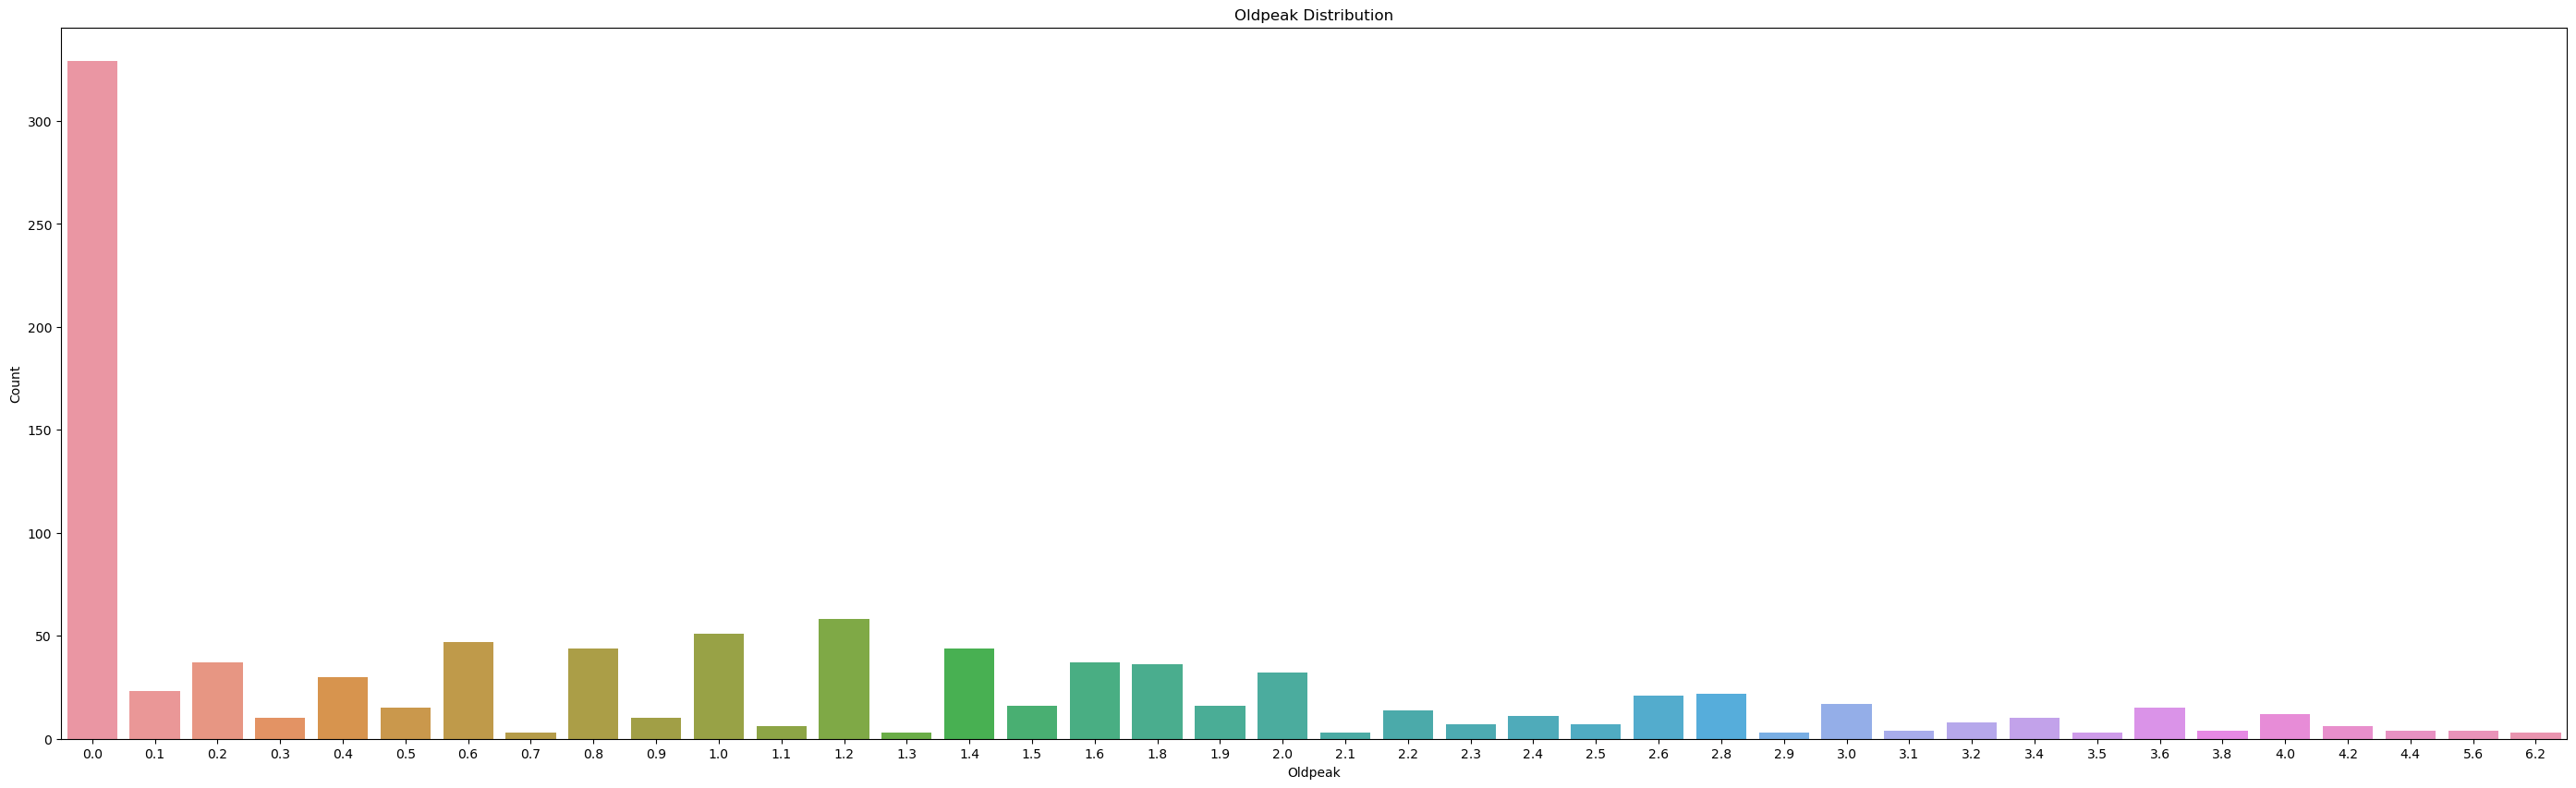

In [45]:
plt.figure(figsize=(35, 10))
sns.countplot(x='oldpeak', data=df)
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

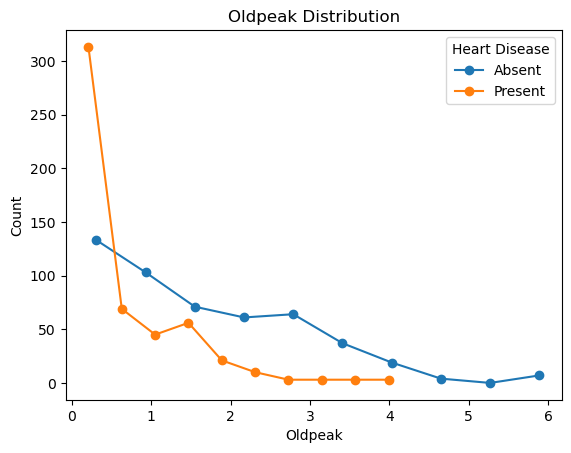

In [46]:
categories = df['target'].unique()
for category in categories:
    subset = df[df['target'] == category]
    counts, bin_edges = np.histogram(subset['oldpeak'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-')

    
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In case of heart disease oldpeak is depressed with a higher chance of being 0

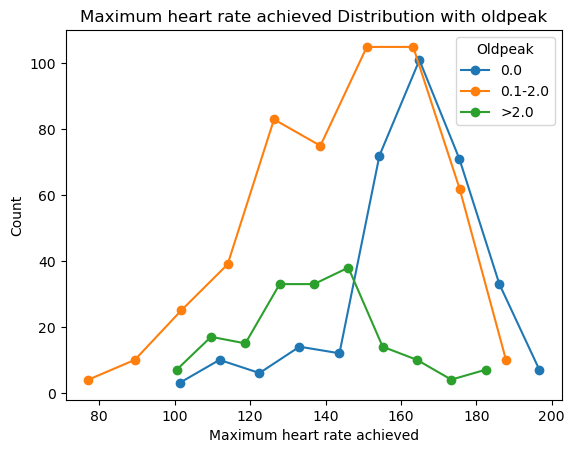

In [47]:
subset = df[df['oldpeak'] == 0]
counts, bin_edges = np.histogram(subset['thalach'])
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

subset = df[df['oldpeak'] != 0]
subset = subset[subset['oldpeak'] <= 2]
counts, bin_edges = np.histogram(subset['thalach'])
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

subset = df[df['oldpeak'] > 2]
counts, bin_edges = np.histogram(subset['thalach'])
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_midpoints, counts, marker='o', linestyle='-', label=category)

plt.title('Maximum heart rate achieved Distribution with oldpeak')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.legend(title = 'Oldpeak', labels=['0.0', '0.1-2.0', '>2.0'])
plt.show()

Oldpeak reduces with maximum heart rate achieved

# Weak Correlated Features

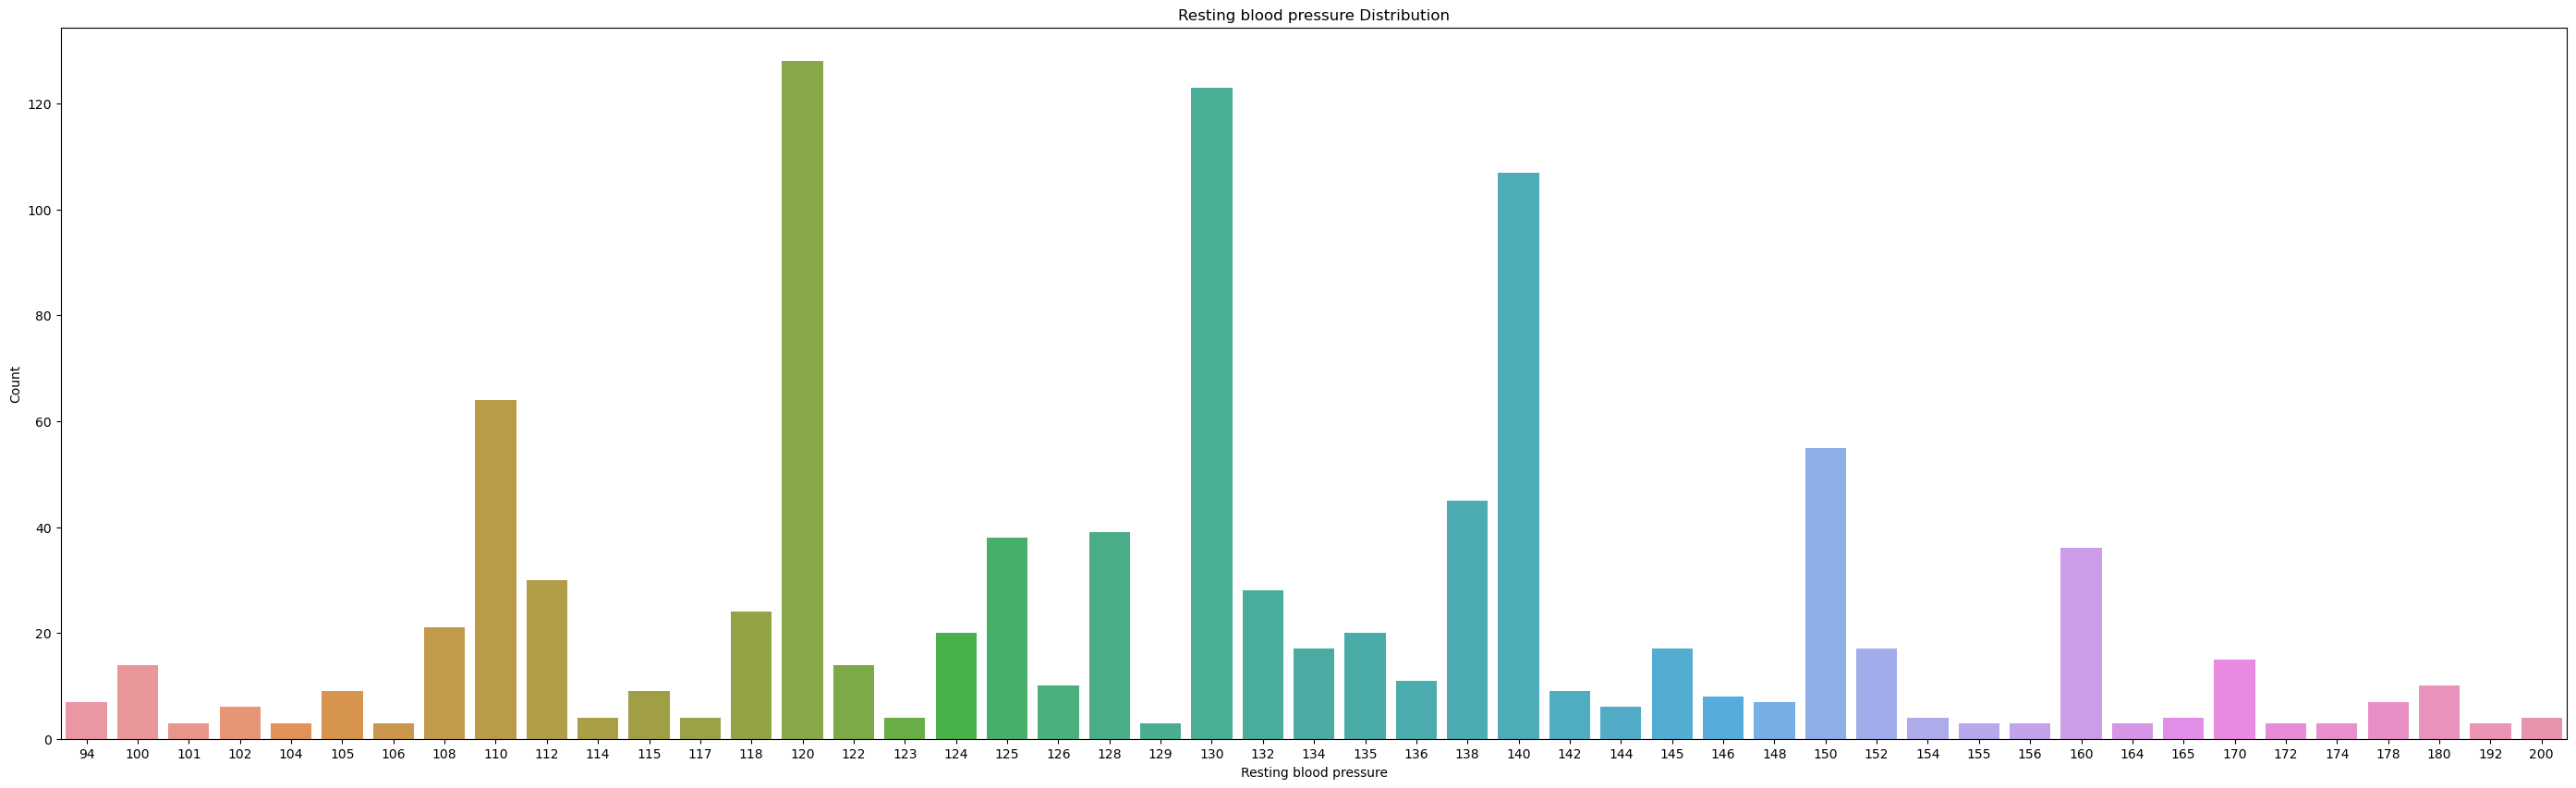

In [48]:
plt.figure(figsize=(35, 10))
sns.countplot(x='trestbps', data=df)
plt.title('Resting blood pressure Distribution')
plt.xlabel('Resting blood pressure')
plt.ylabel('Count')
plt.show()

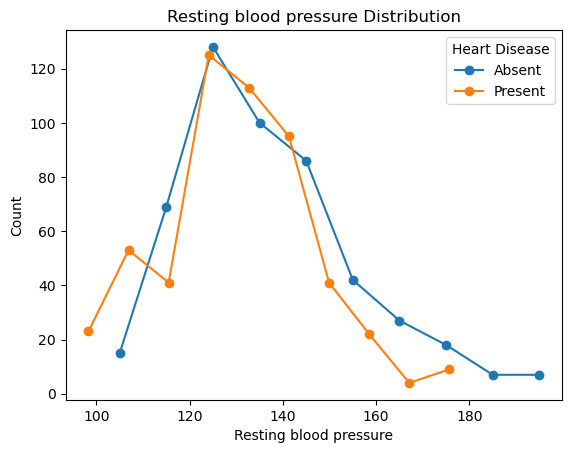

In [49]:
categories = df['target'].unique()
for category in categories:
    subset = df[df['target'] == category]
    counts, bin_edges = np.histogram(subset['trestbps'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-')

    
plt.title('Resting blood pressure Distribution')
plt.xlabel('Resting blood pressure')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

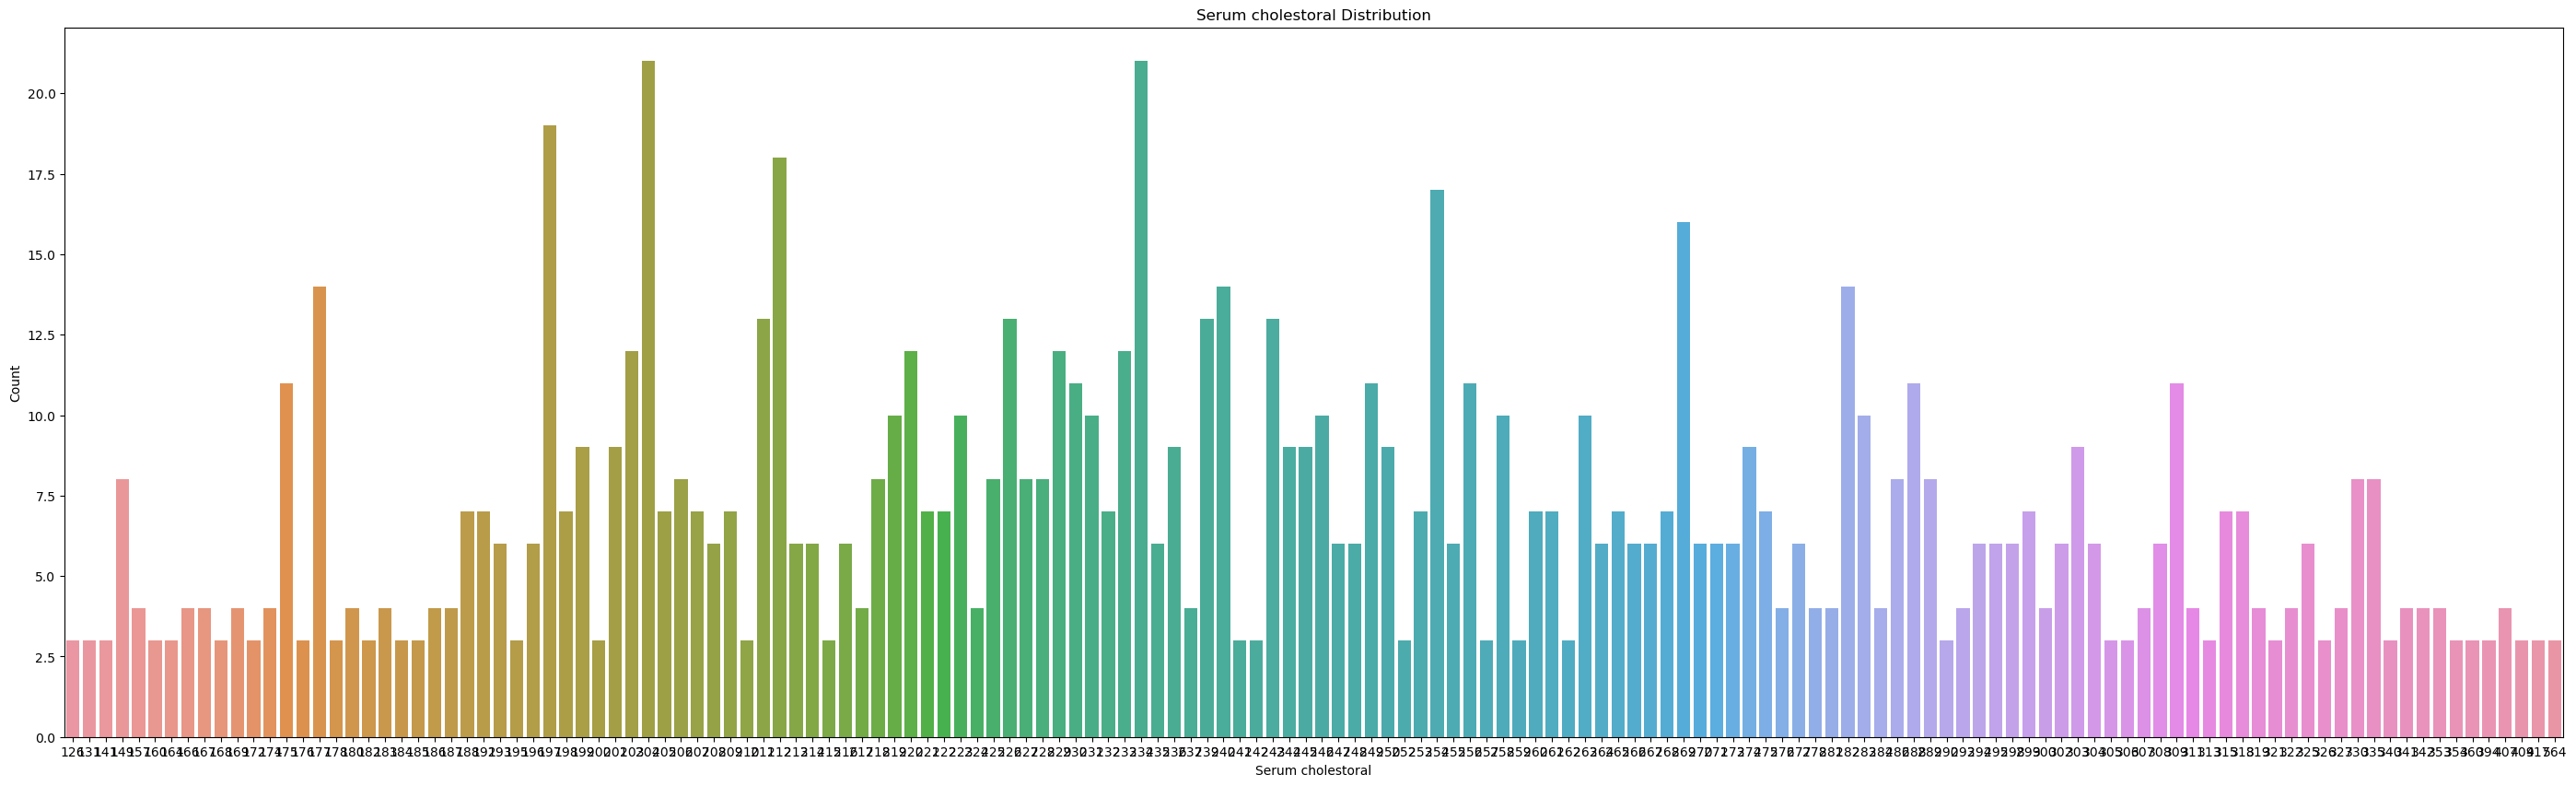

In [50]:
plt.figure(figsize=(35, 10))
sns.countplot(x='chol', data=df)
plt.title('Serum cholestoral Distribution')
plt.xlabel('Serum cholestoral')
plt.ylabel('Count')
plt.show()

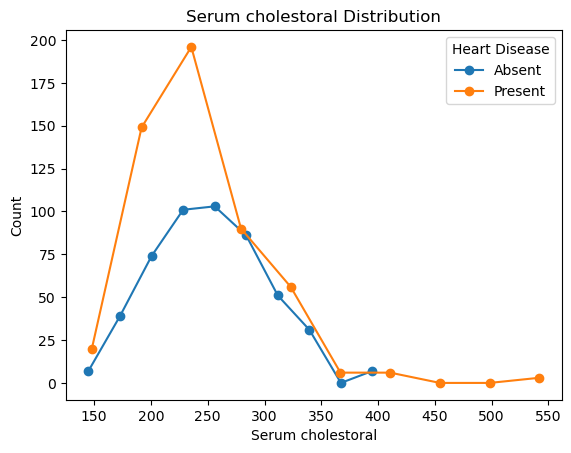

In [51]:
categories = df['target'].unique()
for category in categories:
    subset = df[df['target'] == category]
    counts, bin_edges = np.histogram(subset['chol'])
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-')

plt.title('Serum cholestoral Distribution')
plt.xlabel('Serum cholestoral')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

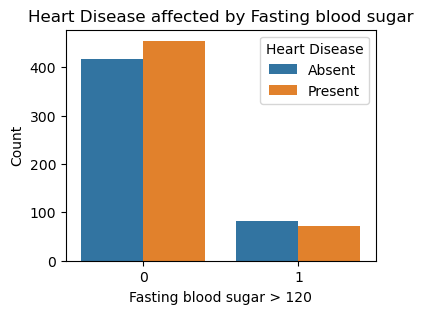

In [52]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='fbs', hue='target')
plt.xlabel('Fasting blood sugar > 120')
plt.ylabel('Count')
plt.title('Heart Disease affected by Fasting blood sugar')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

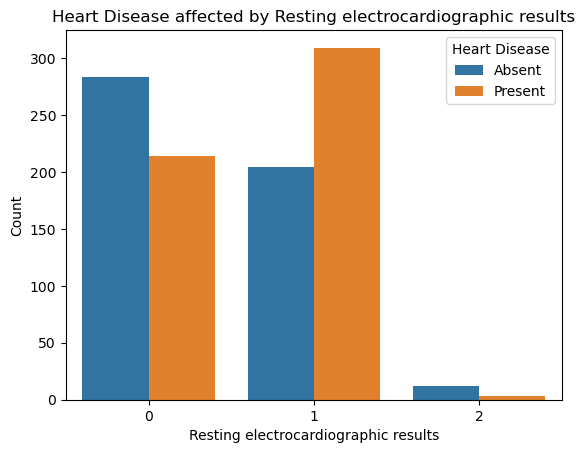

In [53]:
sns.countplot(data=df, x='restecg', hue='target')
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Count')
plt.title('Heart Disease affected by Resting electrocardiographic results')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

# Data Preprocessing for Machine Learning Model

In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group'],
      dtype='object')

In [55]:
df1 = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].copy()

# One-Hot Encoding
df1 = pd.get_dummies(df1, drop_first = False, columns = ['cp', 'restecg', 'slope', 'thal'])
df1.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [56]:
# Min Max Normalisation
df1 = (df1 - df1.min(axis=0)) / (df1.max(axis=0) - df1.min(axis=0))
df1.describe()

age          sex     trestbps         chol          fbs  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.695610     0.354827     0.273973     0.149268   
std       0.189006     0.460373     0.165252     0.117791     0.356527   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.000000     0.245283     0.194064     0.000000   
50%       0.562500     1.000000     0.339623     0.260274     0.000000   
75%       0.666667     1.000000     0.433962     0.340183     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           thalach        exang      oldpeak           ca       target  ...  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  ...   
mean      0.596291     0.336585     0.172825     0.188537     0.513171  ...   
std       0.175616     0.472772     0.189525     0.257699     0.500070  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.465649     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.618321     0.000000     0.129032     0.000000     1.000000  ...   
75%       0.725191     1.000000     0.290323     0.250000     1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

         restecg_0    restecg_1    restecg_2      slope_0      slope_1  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.484878     0.500488     0.014634     0.072195     0.470244   
std       0.500015     0.500244     0.120142     0.258937     0.499357   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           slope_2       thal_0       thal_1       thal_2       thal_3  
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  
mean      0.457561     0.006829     0.062439     0.530732     0.400000  
std       0.498439     0.082397     0.242069     0.499298     0.490137  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     1.000000     0.000000  
75%       1.000000     0.000000     0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 24 columns]

In [57]:
# Spliting data
from sklearn.model_selection import train_test_split

y = df1['target']
X = df1.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(820, 23) (205, 23) (820,) (205,)


# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Intercept: [1.81255533]


<Figure size 1000x1200 with 0 Axes>

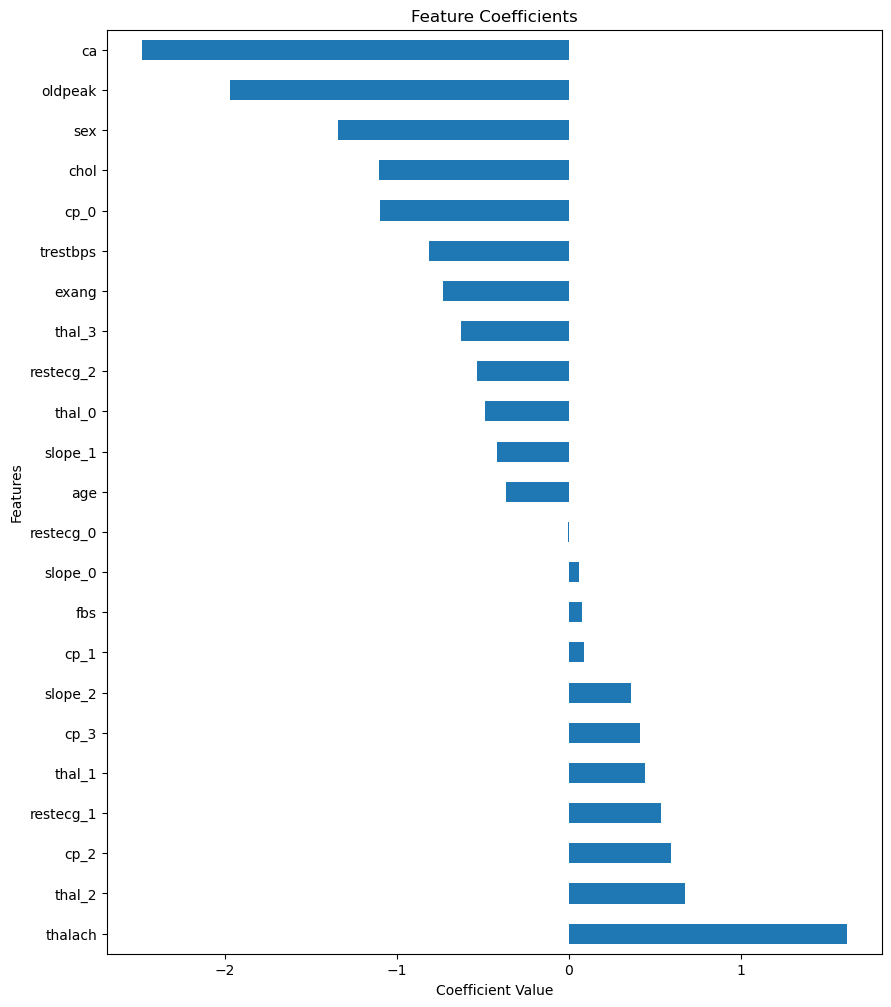

Coefficient
thalach       1.615190
thal_2        0.674875
cp_2          0.595838
restecg_1     0.535787
thal_1        0.442995
cp_3          0.413651
slope_2       0.360856
cp_1          0.087333
fbs           0.075804
slope_0       0.056612
restecg_0    -0.003890
age          -0.363334
slope_1      -0.417802
thal_0       -0.488824
restecg_2    -0.532232
thal_3       -0.629381
exang        -0.730120
trestbps     -0.814463
cp_0         -1.097157
chol         -1.106471
sex          -1.344220
oldpeak      -1.968723
ca           -2.482560

In [59]:
print("Intercept:", logreg.intercept_)

plt.figure(figsize=(10, 12))
coefficients = pd.DataFrame(logreg.coef_.ravel(), X.columns)
coefficients.columns = ['Coefficient']
coefficients.sort_values(by=['Coefficient'], inplace=True, ascending=False)

coefficients.plot(kind='barh', figsize=(10, 12), legend=False)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

coefficients

In [60]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_pred, mode='markers', name='Pred'))

In the places where the red dot and blue dot do not overlap are the wrong predictions and where both dots overlap those are the right predicted values.

In [61]:
from sklearn.metrics import accuracy_score
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))

The Accuracy Score is:  0.8731707317073171


In [62]:
# Precision, Recall, F1-Score, Support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       103
         1.0       0.84      0.92      0.88       102

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



In [63]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[85 18]
 [ 8 94]]


Area under ROC Curve: 0.8734056729487911


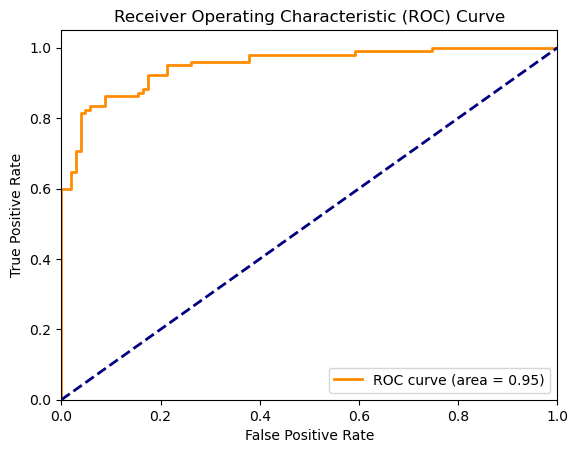

In [64]:
# ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=32)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_pred, mode='markers', name='Pred'))

In [66]:
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The Accuracy Score is:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       103
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[103   0]
 [  0 102]]


Area under ROC Curve: 1.0


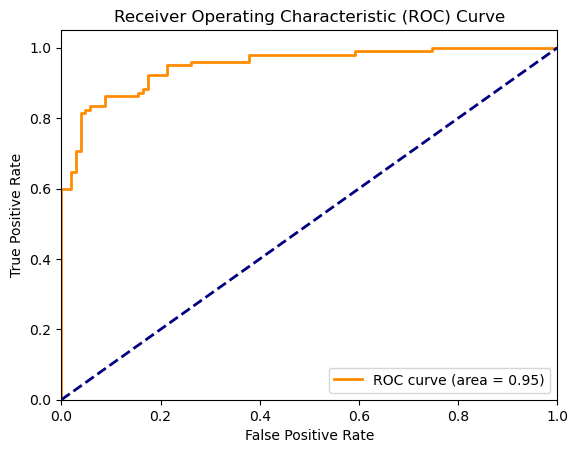

In [67]:
# ROC Curve
print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machine (SVM)

In [68]:
from sklearn.svm import SVC

svm_model = SVC(probability = True, kernel = 'poly', C=10, gamma = 1)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_pred, mode='markers', name='Pred'))

In [69]:
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The Accuracy Score is:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       103
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[103   0]
 [  0 102]]


Area under ROC Curve: 1.0


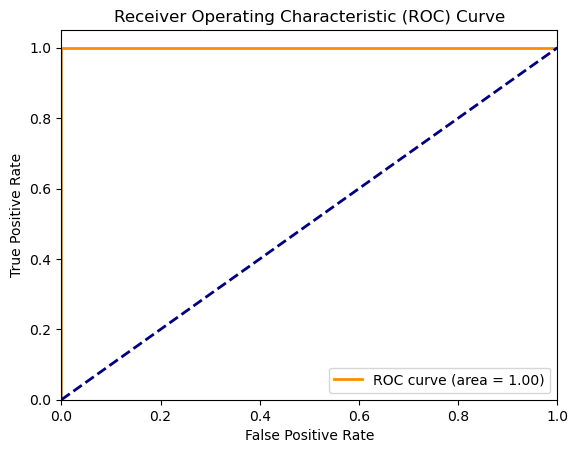

In [70]:
# ROC Curve
print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators = 1000)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
y_pred_prob = gb_model.predict_proba(X_test)[:, 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_pred, mode='markers', name='Pred'))

In [72]:
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The Accuracy Score is:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       103
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[103   0]
 [  0 102]]


Area under ROC Curve: 1.0


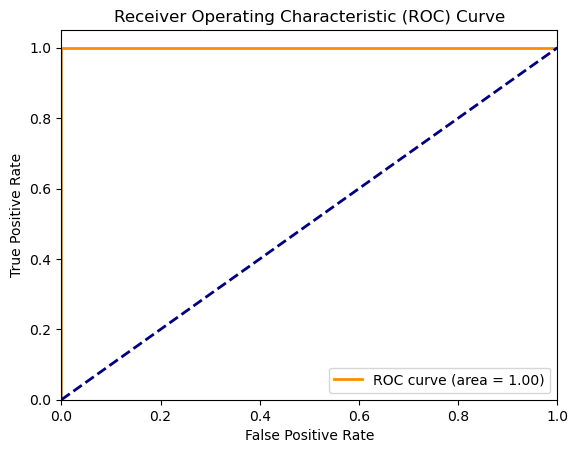

In [73]:
# ROC Curve
print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_pred, mode='markers', name='Pred'))

In [75]:
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The Accuracy Score is:  0.848780487804878
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       103
         1.0       0.85      0.84      0.85       102

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

[[88 15]
 [16 86]]


Area under ROC Curve: 0.848753093470398


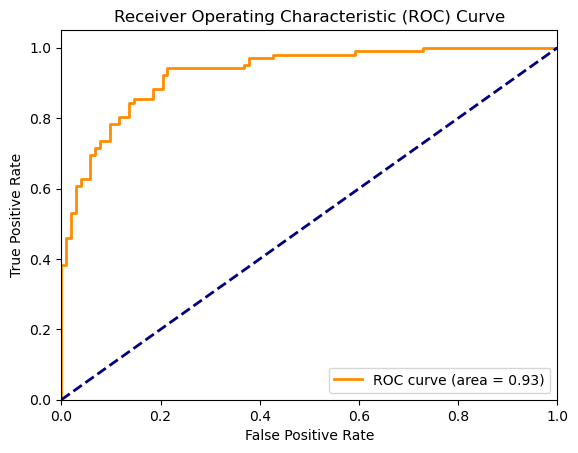

In [76]:
# ROC Curve
print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# LightGBM

In [77]:
import lightgbm

lgb_model = lightgbm.LGBMClassifier(random_state = 32)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_pred, mode='markers', name='Pred'))

[LightGBM] [Info] Number of positive: 424, number of negative: 396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517073 -> initscore=0.068319
[LightGBM] [Info] Start training from score 0.068319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [78]:
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The Accuracy Score is:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       103
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[103   0]
 [  0 102]]


Area under ROC Curve: 1.0


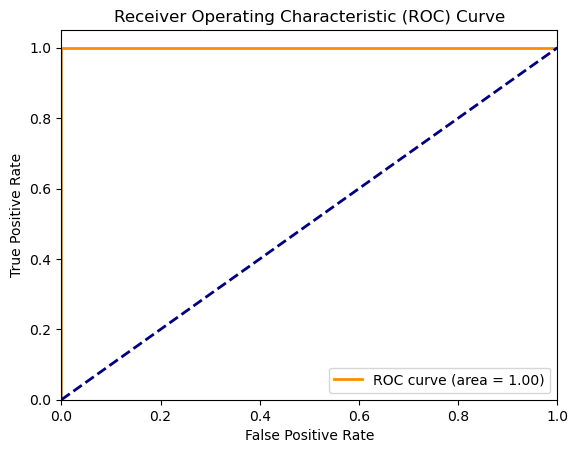

In [79]:
# ROC Curve
print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XGBoost

In [80]:
import xgboost

xgb_model = xgboost.XGBClassifier(random_state=32, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x= np.arange(0, len(y_test)), y = y_pred, mode='markers', name='Pred'))

In [81]:
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The Accuracy Score is:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       103
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[103   0]
 [  0 102]]


Area under ROC Curve: 1.0


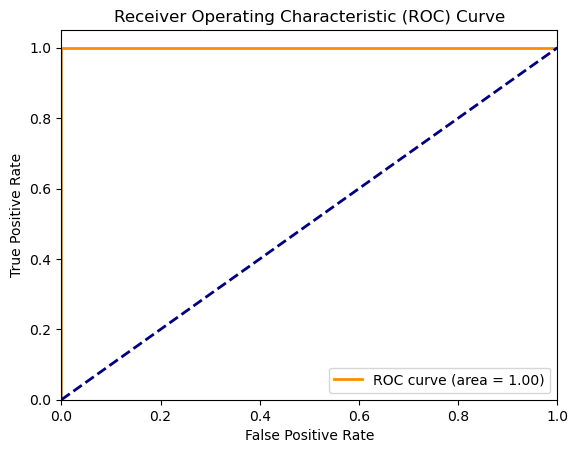

In [82]:
# ROC Curve
print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Neural Networks (Deep Learning)

In [83]:
# Neural Networks (Deep Learning)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12288     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [84]:
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The Accuracy Score is:  0.9804878048780488
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       103
         1.0       1.00      0.96      0.98       102

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

[[103   0]
 [  4  98]]


Area under ROC Curve: 0.9803921568627452


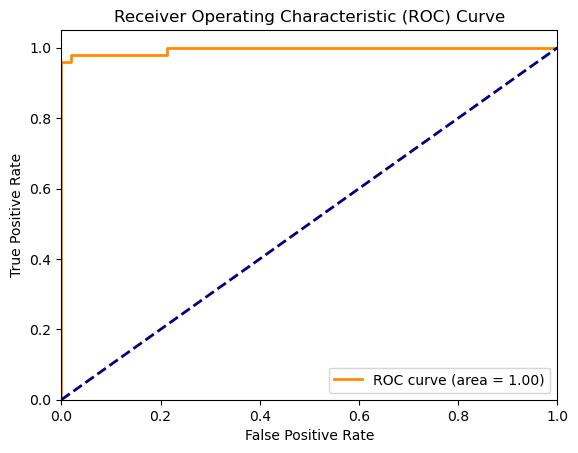

In [85]:
# ROC Curve
print('Area under ROC Curve:', roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

LightGBM, XGBoost, Gradient Boosting Classifier, Support Vector Machine > Random Forest Classifier > Neural Networks > Logistic Regression > Naive Bayes